
## Perceptron Playground: Where It Works and Where It Breaks

**Goal:** See how a classic perceptron behaves on different 2D datasets — some **linearly separable** and others **not**.  
We'll fit a perceptron, visualize decision boundaries, and interpret what we see.

**What you'll learn**
- What "linear separability" means in practice
- Why the perceptron fits some datasets easily and struggles on others (XOR, circles, moons)
- How to interpret decision regions and training accuracy


### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification

### Plot function

In [2]:
def plot_decision_regions_fallback(X, y, clf, title=None):
    """Basic decision-region plotter for 2D data if mlxtend is unavailable."""
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[y==0, 0], X[y==0, 1], label="Class 0")
    plt.scatter(X[y==1, 0], X[y==1, 1], label="Class 1")
    if title:
        plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2"); plt.legend(); plt.tight_layout(); plt.show()

def plot_regions(X, y, clf, title=None):
        plot_decision_regions_fallback(X, y, clf, title=title)


In [3]:

def fit_and_plot(X, y, perceptron_kwargs=None, title_suffix=""):
    if perceptron_kwargs is None:
        perceptron_kwargs = dict(alpha=0.0, max_iter=1000, eta0=0.1, tol=1e-3, random_state=42)
    clf = Perceptron(**perceptron_kwargs)
    clf.fit(X, y)
    preds = clf.predict(X)
    acc = accuracy_score(y, preds)

    plot_regions(X, y, clf, title=f"Perceptron decision regions {title_suffix}\nTrain accuracy: {acc:.3f}")
    return clf, acc



### 1) Linearly Separable (Easy Mode)

We generate two Gaussian blobs that **can be separated by a straight line**.  
A perceptron should find a linear boundary that correctly splits the classes.

**Interpretation:** If data are linearly separable, the perceptron converges to a solution that classifies all points correctly (on the training set).


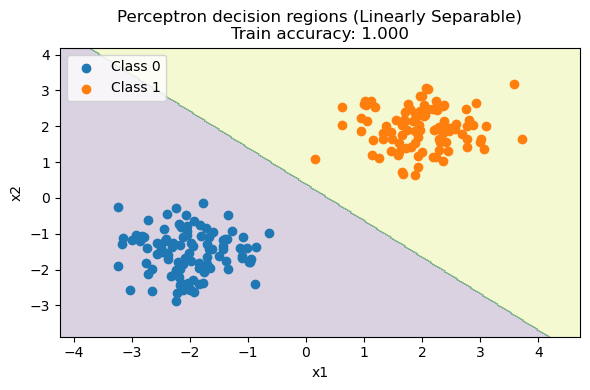

<Figure size 640x480 with 0 Axes>

In [12]:

X_lin, y_lin = make_blobs(n_samples=200, centers=[(-2, -1.5), (2, 2)], cluster_std=[0.6, 0.6], random_state=7)
_ = fit_and_plot(X_lin, y_lin, title_suffix="(Linearly Separable)")
# plt.savefig("/Users/tusharsingh/Work/Blogs/Blog1/plots/plot1.png",dpi=300, bbox_inches="tight")



### 2) Nearly Separable (Some Overlap)

Now we make the blobs a bit closer so some points overlap.  
A perceptron still learns a **single straight boundary**, but **cannot** separate overlapping points perfectly.

**Interpretation:** You may see accuracy below 1.0 because **no single line** can separate every mislabeled/overlapping point.


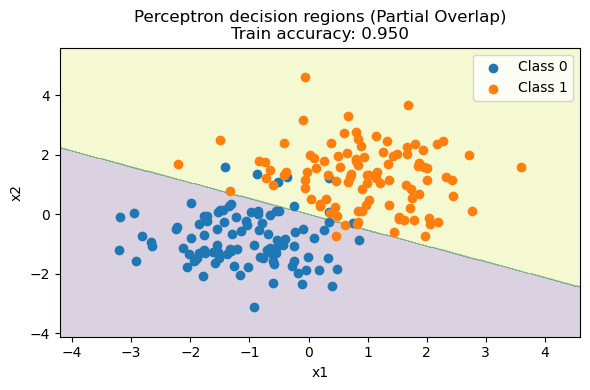

In [5]:

X_close, y_close = make_blobs(n_samples=200, centers=[(-1.0, -0.8), (1.0, 1.2)], cluster_std=[1.0, 1.0], random_state=13)
_ = fit_and_plot(X_close, y_close, title_suffix="(Partial Overlap)")



### 3) XOR (Not Linearly Separable)

The **XOR** pattern labels alternate corners differently: (0,0) and (1,1) are one class; (0,1) and (1,0) are the other.  
No straight line can separate these classes.

**Interpretation:** The perceptron draws a straight boundary and will **misclassify** at least two corners. This is a classic failure case.


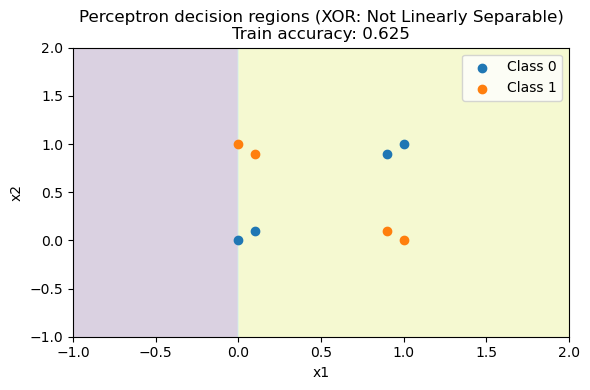

In [6]:

X_xor = np.array([[0,0],[0,1],[1,0],[1,1],
                  [0.1,0.1],[0.9,0.1],[0.1,0.9],[0.9,0.9]])
y_xor = np.array([0,1,1,0, 0,1,1,0])

_ = fit_and_plot(X_xor, y_xor, title_suffix="(XOR: Not Linearly Separable)")



### 4) Two Moons (Curved Boundary Needed)

The **moons** dataset has interleaved crescent shapes.  
A perceptron can only draw a **straight** boundary, so it fails to carve out the curves.

**Interpretation:** Expect a decision boundary that slices through both moons, with limited accuracy. Non-linear methods or feature transformations are needed.


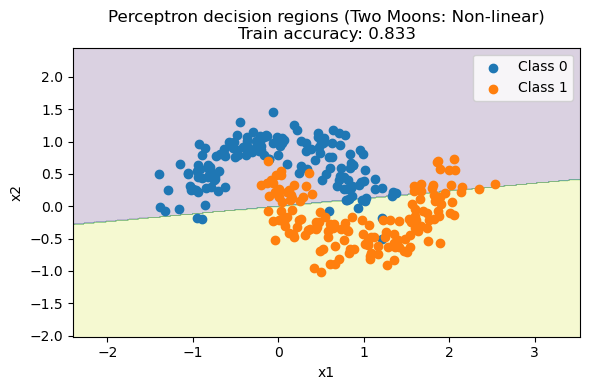

In [7]:

X_moons, y_moons = make_moons(n_samples=300, noise=0.2, random_state=0)
_ = fit_and_plot(X_moons, y_moons, title_suffix="(Two Moons: Non-linear)")



### 5) Concentric Circles (Radial Separation)

The **circles** dataset has an inner circle and an outer ring.  
A single straight line can't separate "inside" vs "outside."

**Interpretation:** Perceptron accuracy stays limited because the true boundary is **circular**, not linear.


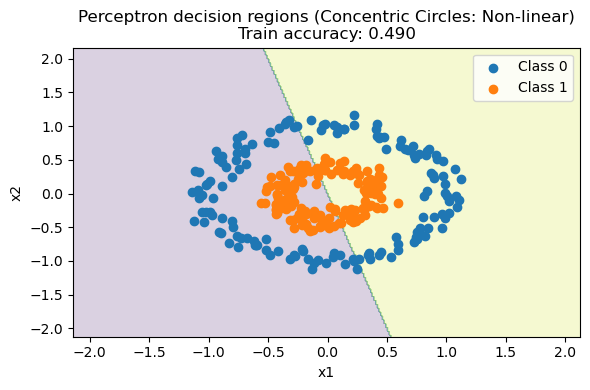

In [8]:

X_circ, y_circ = make_circles(n_samples=300, factor=0.4, noise=0.08, random_state=0)
_ = fit_and_plot(X_circ, y_circ, title_suffix="(Concentric Circles: Non-linear)")



### Summary: What We Saw

- **Perceptron succeeds** on **linearly separable** data by finding a straight-line boundary.
- When classes **overlap**, the best straight line still leaves some errors — accuracy < 1.0 is expected.
- On **non-linear** patterns (XOR, moons, circles), the perceptron cannot represent the true boundary, so it fails.

#### What's next?
To handle non-linear structure, you can:
- Add **feature transformations** (e.g., polynomial features) to make patterns linearly separable in a higher-dimensional space.
- Use **multi-layer networks (MLP)** with non-linear activations — this is why deep learning works on complex data.
